<h1>Data Analysis of Google App's Rating</h1>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df_apps=pd.read_csv("../input/googleplaystore.csv")
df_reviews=pd.read_csv("../input/googleplaystore_user_reviews.csv")

In [3]:
df_apps.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size     Installs  Type Price Content Rating  \
0      159   19M      10,000+  Free     0       Everyone   
1      967   14M     500,000+  Free     0       Everyone   
2    87510  8.7M   5,000,000+  Free     0       Everyone   
3   215644   25M  50,000,000+  Free     0           Teen   
4      967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [4]:
df_apps.columns=["app","category","rating","reviews","size","installs","type","price","content_rating","genres","last_updated","current_ver","android_ver"]

In [5]:
df_apps.drop(["size","last_updated","current_ver","android_ver"],axis=1,inplace=True)

In [6]:
df_apps.isnull().sum()

app                  0
category             1
rating            1474
reviews              0
installs             0
type                 1
price                0
content_rating       0
genres               1
dtype: int64

In [7]:
df_apps[df_apps.rating >5]

Empty DataFrame
Columns: [app, category, rating, reviews, installs, type, price, content_rating, genres]
Index: []

In [8]:
df_apps.drop([10472],inplace=True)

In [9]:
def impute_median(series):
    return series.fillna(series.median())

In [10]:
df_apps.rating =df_apps["rating"].transform(impute_median)

In [11]:
print(df_apps["type"].mode())

0    Free
dtype: object


In [12]:
df_apps["type"].fillna(str(df_apps["type"].mode().values[0]),inplace=True)

In [13]:
df_apps["price"]=df_apps["price"].apply(lambda x:str(x).replace('$','')if '$' in str(x) else str(x))
df_apps["price"]=df_apps["price"].apply(lambda x: float(x))
df_apps["reviews"]=pd.to_numeric(df_apps["reviews"],errors="coerce")

In [14]:
df_apps["installs"]=df_apps["installs"].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
df_apps["installs"]=df_apps["installs"].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
df_apps["installs"]=df_apps["installs"].apply(lambda x: float(x))

In [15]:
df_apps.head()

app        category  rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   reviews    installs  type  price content_rating                     genres  
0      159     10000.0  Free    0.0       Everyone               Art & Design  
1      967    500000.0  Free    0.0       Everyone  Art & Design;Pretend Play  
2    87510   5000000.0  Free    0.0       Everyone               Art & Design  
3   215644  50000000.0  Free    0.0           Teen               Art & Design  
4      967    100000.0  Free    0.0       Everyone    Art & Design;Creativity

In [16]:
df_apps.tail()

app             category  \
10836                               Sya9a Maroc - FR               FAMILY   
10837               Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                         Parkinson Exercices FR              MEDICAL   
10839                  The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840  iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       rating  reviews    installs  type  price content_rating  \
10836     4.5       38      5000.0  Free    0.0       Everyone   
10837     5.0        4       100.0  Free    0.0       Everyone   
10838     4.3        3      1000.0  Free    0.0       Everyone   
10839     4.5      114      1000.0  Free    0.0     Mature 17+   
10840     4.5   398307  10000000.0  Free    0.0       Everyone   

                  genres  
10836          Education  
10837          Education  
10838            Medical  
10839  Books & Reference  
10840          Lifestyle

In [17]:
df_apps.isnull().sum()

app               0
category          0
rating            0
reviews           0
installs          0
type              0
price             0
content_rating    0
genres            0
dtype: int64

In [18]:
df_apps.content_rating.unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [19]:
df_apps['content_rating'] = df_apps['content_rating'].map({'Everyone': 'child','Teen':'everyone','Everyone 10+':'teenager','Mature 17+':'adults','Adults only 18+':'adults','Unrated':'unrated'})

In [20]:
df_apps.shape

(10840, 9)

In [21]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             10840 non-null  object 
 1   category        10840 non-null  object 
 2   rating          10840 non-null  float64
 3   reviews         10840 non-null  int64  
 4   installs        10840 non-null  float64
 5   type            10840 non-null  object 
 6   price           10840 non-null  float64
 7   content_rating  10840 non-null  object 
 8   genres          10840 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 846.9+ KB


In [22]:
df_apps.describe()

rating       reviews      installs         price
count  10840.000000  1.084000e+04  1.084000e+04  10840.000000
mean       4.206476  4.441529e+05  1.546434e+07      1.027368
std        0.480342  2.927761e+06  8.502936e+07     15.949703
min        1.000000  0.000000e+00  0.000000e+00      0.000000
25%        4.100000  3.800000e+01  1.000000e+03      0.000000
50%        4.300000  2.094000e+03  1.000000e+05      0.000000
75%        4.500000  5.477550e+04  5.000000e+06      0.000000
max        5.000000  7.815831e+07  1.000000e+09    400.000000

In [23]:
df_apps = df_apps.sort_values(by=["installs"], ascending=False)
df_apps['rank']=tuple(zip(df_apps.installs))
df_apps['rank']=df_apps.groupby('installs',sort=False)['rank'].apply(lambda x : pd.Series(pd.factorize(x)[0])).values
df_apps.head()

app       category  rating  \
3896                            Subway Surfers           GAME     4.5   
3943                                  Facebook         SOCIAL     4.1   
335   Messenger – Text and Video Chat for Free  COMMUNICATION     4.0   
3523                              Google Drive   PRODUCTIVITY     4.4   
3565                              Google Drive   PRODUCTIVITY     4.4   

       reviews      installs  type  price content_rating         genres  rank  
3896  27711703  1.000000e+09  Free    0.0       teenager         Arcade     0  
3943  78128208  1.000000e+09  Free    0.0       everyone         Social     0  
335   56642847  1.000000e+09  Free    0.0          child  Communication     0  
3523   2731211  1.000000e+09  Free    0.0          child   Productivity     0  
3565   2731211  1.000000e+09  Free    0.0          child   Productivity     0

In [24]:
df_apps.drop(["rank"],axis=1,inplace=True)

In [25]:
df_apps.reset_index(inplace=True,drop=True)
df_apps.head(10)

app       category  rating   reviews  \
0                            Subway Surfers           GAME     4.5  27711703   
1                                  Facebook         SOCIAL     4.1  78128208   
2  Messenger – Text and Video Chat for Free  COMMUNICATION     4.0  56642847   
3                              Google Drive   PRODUCTIVITY     4.4   2731211   
4                              Google Drive   PRODUCTIVITY     4.4   2731211   
5                             Google Photos    PHOTOGRAPHY     4.5  10859051   
6                                   YouTube  VIDEO_PLAYERS     4.3  25655305   
7                             Google Photos    PHOTOGRAPHY     4.5  10858538   
8             Skype - free IM & video calls  COMMUNICATION     4.1  10484169   
9                   Google Play Movies & TV  VIDEO_PLAYERS     3.7    906384   

       installs  type  price content_rating                   genres  
0  1.000000e+09  Free    0.0       teenager                   Arcade  
1  1.000000e+09  Free    0.0       everyone                   Social  
2  1.000000e+09  Free    0.0          child            Communication  
3  1.000000e+09  Free    0.0          child             Productivity  
4  1.000000e+09  Free    0.0          child             Productivity  
5  1.000000e+09  Free    0.0          child              Photography  
6  1.000000e+09  Free    0.0       everyone  Video Players & Editors  
7  1.000000e+09  Free    0.0          child              Photography  
8  1.000000e+09  Free    0.0          child            Communication  
9  1.000000e+09  Free    0.0       everyone  Video Players & Editors

In [26]:
df_apps[df_apps.content_rating=='unrated']

app category  rating  reviews  installs  type  price  \
6557  DC Universe Online Map    TOOLS     4.1     1186   50000.0  Free    0.0   
9318     Best CG Photography   FAMILY     4.3        1     500.0  Free    0.0   

     content_rating         genres  
6557        unrated          Tools  
9318        unrated  Entertainment

In [27]:
#create a new dataframe
data=pd.DataFrame(df_apps.iloc[:,3:5])
data.head(3)

reviews      installs
0  27711703  1.000000e+09
1  78128208  1.000000e+09
2  56642847  1.000000e+09

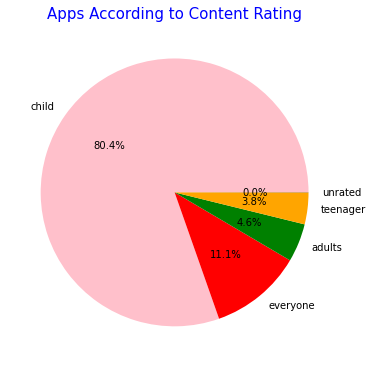

In [28]:
labels = df_apps.content_rating.value_counts().index
colors = ['pink','r','g','orange','black']
explode = [0,0,0,0,0]
sizes = df_apps.content_rating.value_counts().values

# visual 
plt.figure(0,figsize = (6,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Apps According to Content Rating',color = 'blue',fontsize = 15)
plt.show()

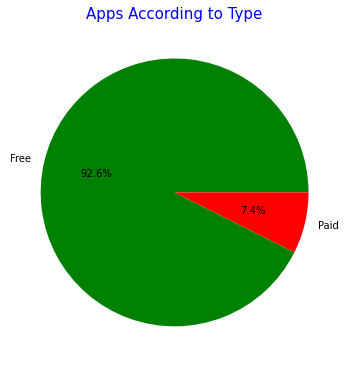

In [29]:
labels = df_apps.type.value_counts().index
colors = ["g","r"]
explode = [0,0]
sizes = df_apps.type.value_counts().values

# visual 
plt.figure(0,figsize = (6,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Apps According to Type',color = 'blue',fontsize = 15)
plt.show()

In [30]:
df_apps.head(2)

app category  rating   reviews      installs  type  price  \
0  Subway Surfers     GAME     4.5  27711703  1.000000e+09  Free    0.0   
1        Facebook   SOCIAL     4.1  78128208  1.000000e+09  Free    0.0   

  content_rating  genres  
0       teenager  Arcade  
1       everyone  Social

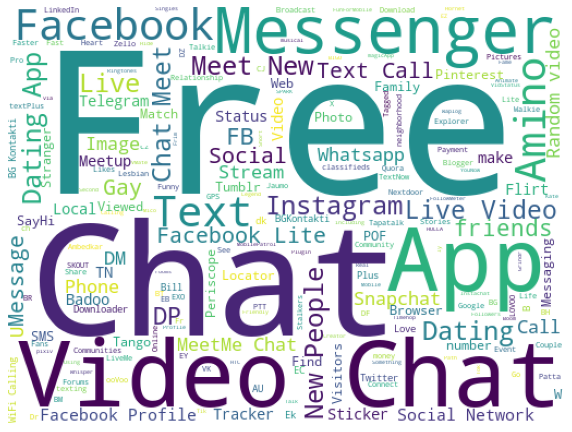

In [31]:
xcat = df_apps.app[df_apps.category == 'SOCIAL']
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(xcat))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

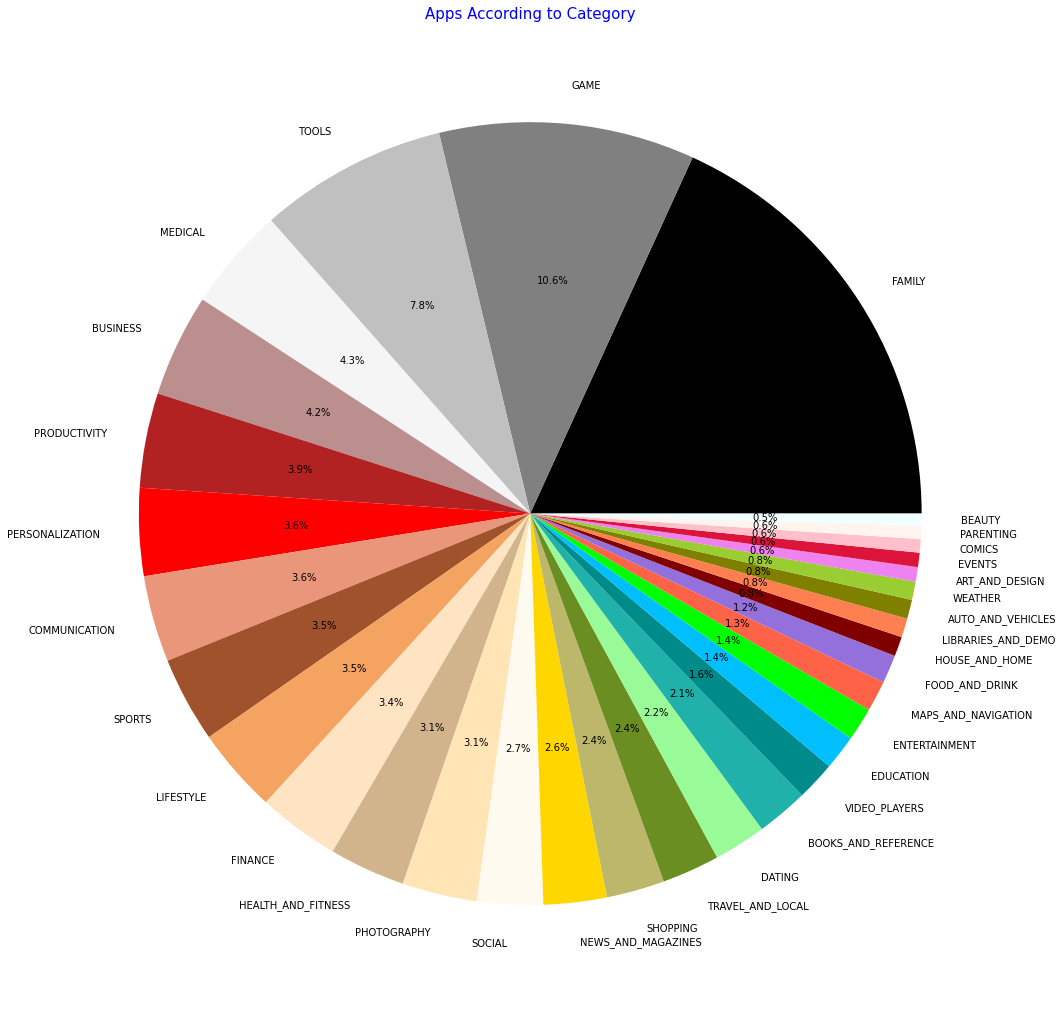

In [32]:
labels = df_apps.category.value_counts().index
colors = ["black","gray","silver","whitesmoke","rosybrown",
          "firebrick","red","darksalmon","sienna","sandybrown",
          "bisque","tan","moccasin","floralwhite","gold",
          "darkkhaki","olivedrab","palegreen","lightseagreen","darkcyan",
          "deepskyblue","lime","tomato","mediumpurple","maroon",
          "coral","olive","yellowgreen","violet","crimson",
          "pink","seashell","azure"]
explode = [0,0,0,0,0,
           0,0,0,0,0,
           0,0,0,0,0,
           0,0,0,0,0,
           0,0,0,0,0,
           0,0,0,0,0,
           0,0,0]
sizes = df_apps.category.value_counts().values

# visual 
plt.figure(0,figsize = (18,18))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Apps According to Category',color = 'blue',fontsize = 15)
plt.show()